In [20]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
sns.set_theme(style="darkgrid")

In [21]:
data = make_blobs(n_samples=200, n_features=2)
X = data[0]
Y = data[1]

<Axes: >

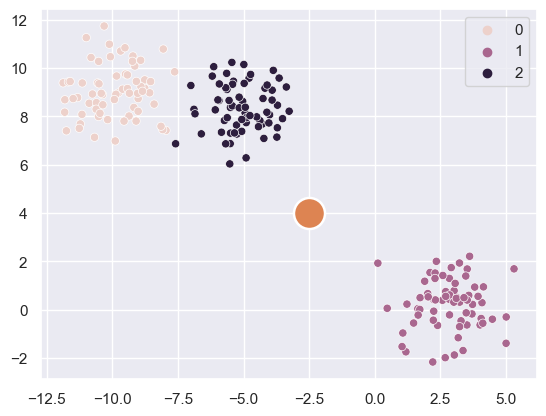

In [105]:
sns.scatterplot(x=X[:, 0],
                y=X[:, 1],
                hue=Y.reshape(-1))
sns.scatterplot(x=[-2.5],
                y=[4],
                s=500)

In [99]:
Y.shape, X.shape

((200,), (200, 2))

## Implementing K-Means

In [554]:
class KMeans:
    def __init__(self,
                 m,
                 k,
                 n) -> None:
        """
            Parameters:
            k: int
                Number of clusters to assign
            
            n: int
                Number of features in the dataset
        """
        self.k = k
        self.m = m
        self.n = n
        self.labels = np.zeros((m,), dtype=int)

        # initialize the random centers
        scale_factor = -10
        self.centers =  np.random.random((self.k, self.n)) * scale_factor

    

        
    def distance(self,
                 X):
        
        dis = np.zeros((self.m, self.k))
        for i in range(self.k):
            dis[:, i] = np.sqrt(np.sum(np.square(X - self.centers[i, :]), axis=1))  
        return dis 
    
    def update_centers(self,
                       X):
        
        dis = self.distance(X)

        # assign labels for the points
        self.labels = np.argmin(dis, axis=1).reshape(-1, 1)
        # print(self.labels.shape)

        # update the centers
        for i in range(self.k):
            for j in range(self.n):
                # k, n
                self.centers[i, j] = (np.mean(X[:, j].reshape(-1, 1)[self.labels == i]))
            

    def fit(self,
            X,
            iterations = 10):
        """
        Here the X should in the shape -> (x1, x2)
        x1 and x2 are features here.
        """

        for epoch in range(iterations):
            self.update_centers(X)
            print("The centers are:\n")
            print(self.centers)


        

In [574]:
m, n = X.shape
model = KMeans(m=m, n=n, k = 3)


In [575]:
model.fit(X=X, iterations=2)


The centers are:

[[-7.50425147  8.68982558]
 [        nan         nan]
 [ 2.85154553  0.22575285]]
The centers are:

[[        nan         nan]
 [-4.03505948  5.85436122]
 [        nan         nan]]


In [496]:
model.fit(X=X, iterations=1)


(200,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [239]:
a = np.arange(10)
b = np.ones(10)
a, b, a[b == 1]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [93]:
a = np.arange(10).reshape(5, 2)
np.argmin(a, axis=1), a

(array([0, 0, 0, 0, 0], dtype=int64),
 array([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]))

In [198]:
a = np.zeros((10, 2))
a[:, 1] = np.arange(10)
b = np.ones((1, 2)) * 4
a, b, a-b

(array([[0., 0.],
        [0., 1.],
        [0., 2.],
        [0., 3.],
        [0., 4.],
        [0., 5.],
        [0., 6.],
        [0., 7.],
        [0., 8.],
        [0., 9.]]),
 array([[4., 4.]]),
 array([[-4., -4.],
        [-4., -3.],
        [-4., -2.],
        [-4., -1.],
        [-4.,  0.],
        [-4.,  1.],
        [-4.,  2.],
        [-4.,  3.],
        [-4.,  4.],
        [-4.,  5.]]))